In [16]:
from lightkurve import KeplerTargetPixelFile, KeplerLightCurve, KeplerLightCurveFile
import numpy as np
import matplotlib.pyplot as plt
from lightkurve import SFFCorrector

In [4]:
lctpf_hats11 = KeplerTargetPixelFile.from_archive("216414930", cadence="lc",
                                          quality_bitmask='hardest');
sctpf_hats11 = KeplerTargetPixelFile.from_archive("216414930", cadence="sc",
                                          quality_bitmask='hardest');

INFO: Found cached file ./mastDownload/K2/ktwo216414930-c07_lc/ktwo216414930-c07_lpd-targ.fits.gz with expected size 3623134. [astroquery.query]
INFO: Found cached file ./mastDownload/K2/ktwo216414930-c07_sc/ktwo216414930-c07_spd-targ.fits.gz with expected size 102173470. [astroquery.query]


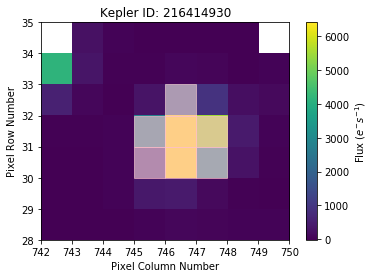

In [5]:
%matplotlib inline
lctpf_hats11.plot(aperture_mask = lctpf_hats11.pipeline_mask);

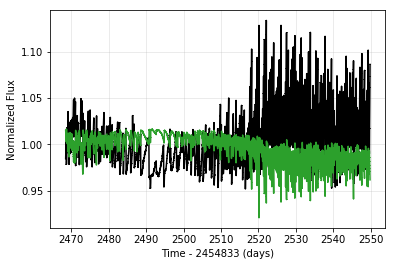

In [6]:
lc_hats11_m = lctpf_hats11.to_lightcurve(aperture_mask=lctpf_hats11.pipeline_mask)
lc_hats11 = lctpf_hats11.to_lightcurve(aperture_mask='all')
ax=lc_hats11.plot()
lc_hats11_m.plot(ax=ax, color='C2');

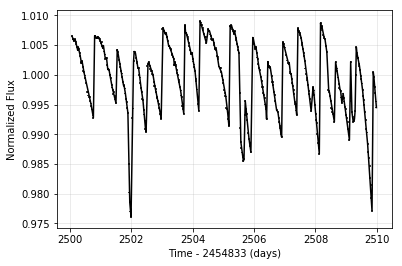

In [7]:
lc_hats11_m[(lc_hats11.time>2500) & (lc_hats11.time<2510)].plot()

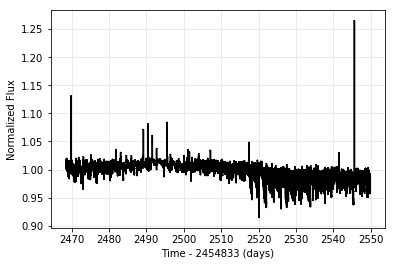

In [8]:
sc_hats11_m = sctpf_hats11.to_lightcurve(aperture_mask=sctpf_hats11.pipeline_mask)
sc_hats11_m.plot()

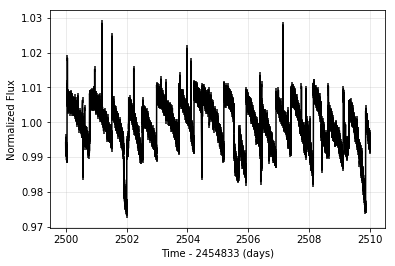

In [9]:
sc_hats11_m[(sc_hats11_m.time>2500) & (sc_hats11_m.time<2510)].plot()

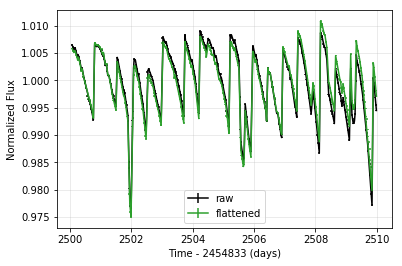

In [11]:
#Remove nans and outliers
lc = lc_hats11_m.remove_nans().remove_outliers()

#Remove long term trends
lc = lc.flatten(window_length=401)

ax = lc_hats11_m[(lc_hats11.time>2500) & (lc_hats11.time<2510)].plot(label='raw')
lc[(lc.time>2500)&(lc.time<2510)].plot(ax=ax, color='C2',label="flattened");

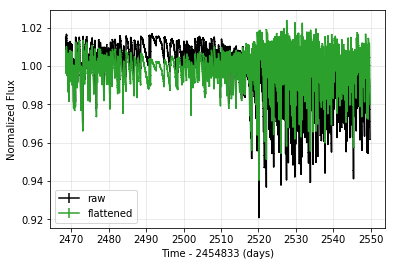

In [12]:
ax = lc_hats11_m.plot(label='raw')
lc.plot(ax=ax, color='C2',label="flattened");

100%|██████████| 1/1 [00:00<00:00,  1.87it/s]


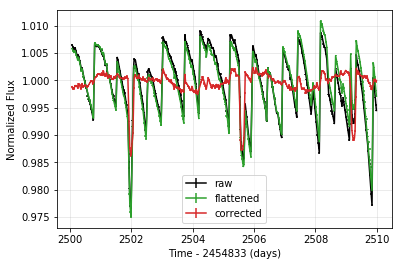

In [13]:
corr_lc = lc.correct()
ax = lc_hats11_m[(lc_hats11.time>2500) & (lc_hats11.time<2510)].plot(label='raw')
ax1 = lc[(lc.time>2500)&(lc.time<2510)].plot(ax=ax, color='C2',label="flattened");
corr_lc[(corr_lc.time>2500) & (corr_lc.time<2510)].plot(ax=ax1,color='C3',label="corrected")

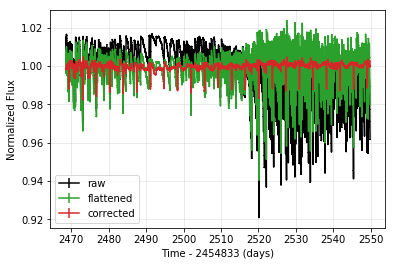

In [14]:
ax = lc_hats11_m.plot(label='raw')
ax1=lc.plot(ax=ax, color='C2',label="flattened")
corr_lc.plot(ax=ax1,color='C3',label="corrected")

100%|██████████| 20/20 [00:00<00:00, 23.01it/s]


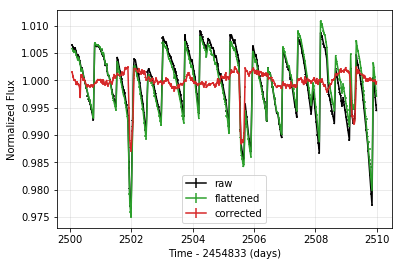

In [15]:
corr20_lc = lc.correct(windows=20)
ax = lc_hats11_m[(lc_hats11.time>2500) & (lc_hats11.time<2510)].plot(label='raw')
ax1 = lc[(lc.time>2500)&(lc.time<2510)].plot(ax=ax, color='C2',label="flattened");
corr20_lc[(corr20_lc.time>2500) & (corr20_lc.time<2510)].plot(ax=ax1,color='C3',label="corrected")

moving onto the replicating sff tutorial so i can figure out how to make the diagnostic plots.  however i'm just going to proceed with the pipeline mask right now rather than using a custom mask as is done in the tutorial...

In [17]:
lc.normalize?

Signature: lc.normalize()
Docstring:
Returns a normalized version of the lightcurve.

The normalized lightcurve is obtained by dividing `flux` and `flux_err`
by the median flux.

Returns
-------
normalized_lightcurve : LightCurve object
    A new ``LightCurve`` in which `flux` and `flux_err` are divided
    by the median.
File:      ~/Documents/Documents/K2/learning_lightkurve/latest_lightkurve/lightkurve/lightkurve/lightcurve.py
Type:      method


In [18]:
sff = SFFCorrector()
lc_corrected = sff.correct(lc.time, lc.flux, lc.centroid_col, lc.centroid_row,
                           niters=1, windows=1, polyorder=5)

100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


Text(0,0.5,'Relative Brightness')

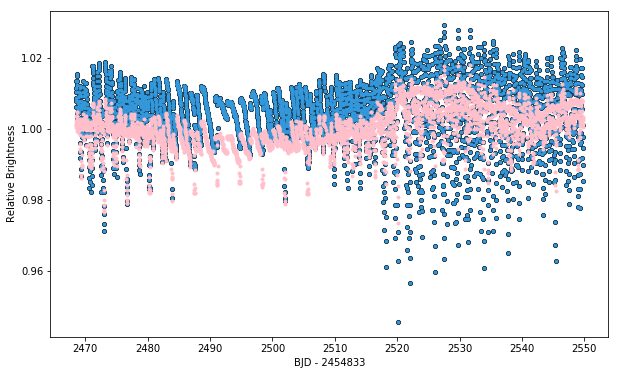

In [19]:
long_term_trend = sff.trend
plt.figure(figsize=(10,6))

dy = 0.004
plt.plot(lc.time, lc.flux + dy, 'ko', ms=4)
plt.plot(lc.time, lc.flux+dy, 'o', color='#3498db', ms=3)
plt.plot(lc_corrected.time, lc_corrected.flux * long_term_trend, 'o', color='pink', ms = 3)

plt.xlabel('BJD - 2454833')
plt.ylabel('Relative Brightness')



(2500, 2510)

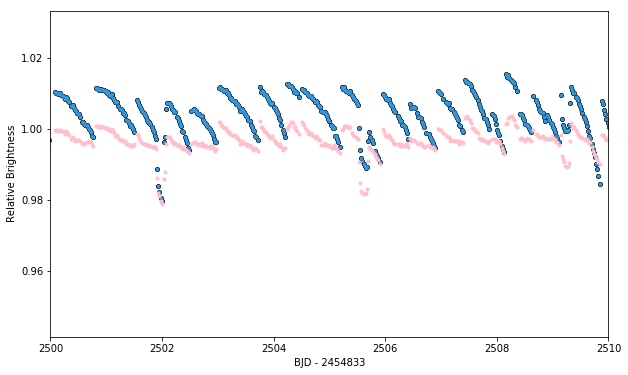

In [21]:
plt.figure(figsize=(10,6))

dy = 0.004
plt.plot(lc.time, lc.flux + dy, 'ko', ms=4)
plt.plot(lc.time, lc.flux+dy, 'o', color='#3498db', ms=3)
plt.plot(lc_corrected.time, lc_corrected.flux * long_term_trend, 'o', color='pink', ms = 3)

plt.xlabel('BJD - 2454833')
plt.ylabel('Relative Brightness')
plt.xlim(2500, 2510)

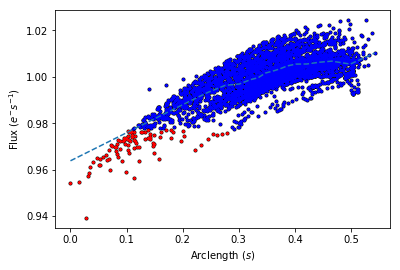

In [22]:
sff._plot_normflux_arclength();

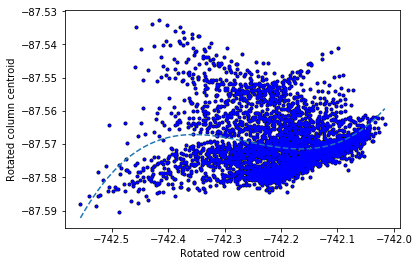

In [23]:
sff._plot_rotated_centroids()

In [60]:
sff = SFFCorrector()
lc_corrected = sff.correct(lc.time, lc.flux, lc.centroid_col, lc.centroid_row,
                           niters=5, windows=5, polyorder=5)

long_term_trend = sff.trend
## the length of this array is length(lc_corrected) / windows


100%|██████████| 5/5 [00:00<00:00,  7.53it/s]


Text(0,0.5,'Relative Brightness')

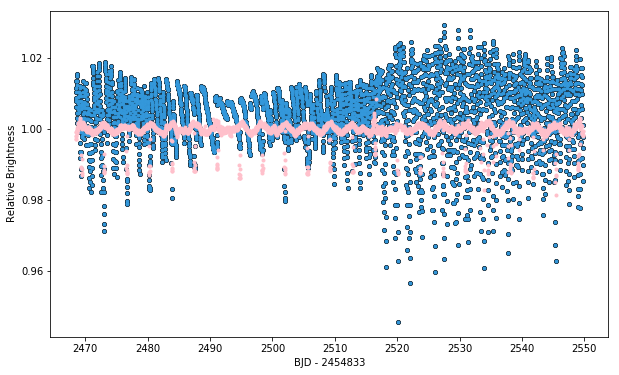

In [61]:
plt.figure(figsize=(10,6))

dy = 0.004
plt.plot(lc.time, lc.flux + dy, 'ko', ms=4)
plt.plot(lc.time, lc.flux+dy, 'o', color='#3498db', ms=3)
# can't put the long term trend back in because it's a shorter array than the flux array...
#plt.plot(lc_corrected.time, lc_corrected.flux * long_term_trend, 'o', color='pink', ms = 3)
plt.plot(lc_corrected.time, lc_corrected.flux, 'o', color='pink', ms = 3)

plt.xlabel('BJD - 2454833')
plt.ylabel('Relative Brightness')


In [35]:
np.size(long_term_trend)

364

In [36]:
np.size(lc_corrected.flux)

3646

(2500, 2510)

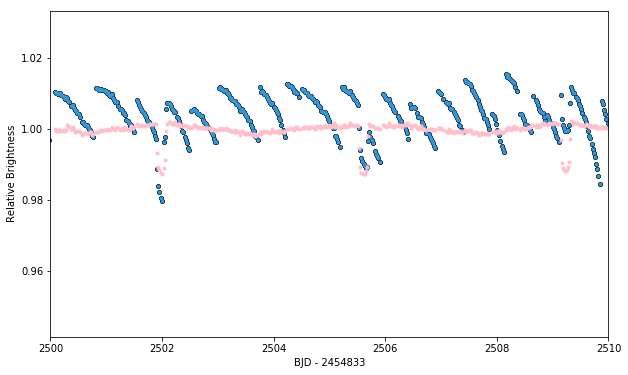

In [62]:
plt.figure(figsize=(10,6))

dy = 0.004
plt.plot(lc.time, lc.flux + dy, 'ko', ms=4)
plt.plot(lc.time, lc.flux+dy, 'o', color='#3498db', ms=3)
#didn't put trend back in.  see above...
plt.plot(lc_corrected.time, lc_corrected.flux, 'o', color='pink', ms = 3)

plt.xlabel('BJD - 2454833')
plt.ylabel('Relative Brightness')
plt.xlim(2500, 2510)

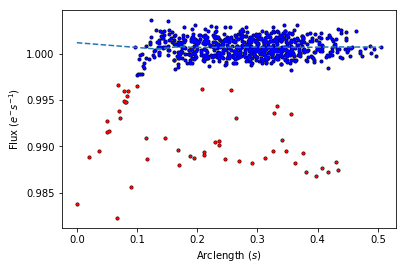

In [63]:
sff._plot_normflux_arclength();

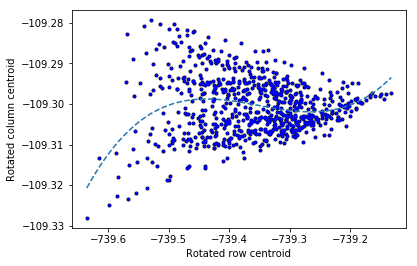

In [64]:
sff._plot_rotated_centroids()

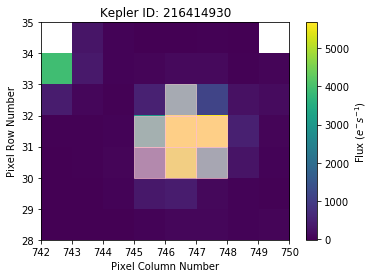

In [65]:
%matplotlib inline
sctpf_hats11.plot(aperture_mask = sctpf_hats11.pipeline_mask);

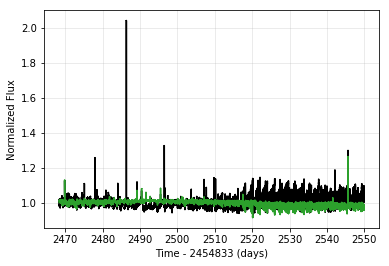

In [66]:
sc_hats11_m = sctpf_hats11.to_lightcurve(aperture_mask=sctpf_hats11.pipeline_mask)
sc_hats11 = sctpf_hats11.to_lightcurve(aperture_mask='all')
ax=sc_hats11.plot()
sc_hats11_m.plot(ax=ax, color='C2');

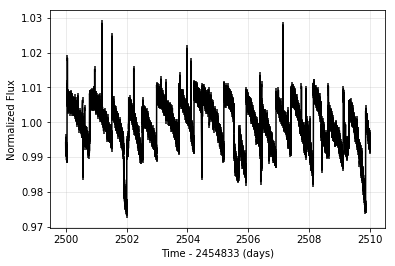

In [67]:
sc_hats11_m[(sc_hats11.time>2500) & (sc_hats11.time<2510)].plot()

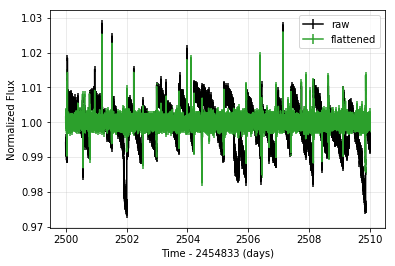

In [78]:
#Remove nans and outliers
sc = sc_hats11_m.remove_nans().remove_outliers()

#Remove long term trends
#sc = sc.flatten(window_length=401) #window_length=401 causes a problem...
sc=sc.flatten(window_length=101)

ax = sc_hats11_m[(sc_hats11.time>2500) & (sc_hats11.time<2510)].plot(label='raw')
sc[(sc.time>2500)&(sc.time<2510)].plot(ax=ax, color='C2',label="flattened");

In [79]:
sc = sc_hats11_m.remove_nans().remove_outliers()

100%|██████████| 1/1 [00:13<00:00, 13.11s/it]


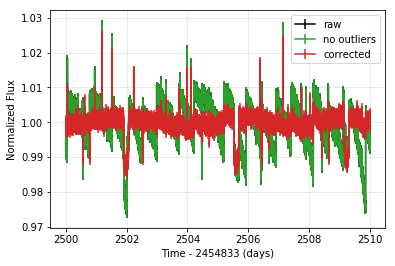

In [80]:
corr_sc = sc.correct()
ax = sc_hats11_m[(sc_hats11.time>2500) & (sc_hats11.time<2510)].plot(label='raw')
ax1 = sc[(sc.time>2500)&(sc.time<2510)].plot(ax=ax, color='C2',label="no outliers");
corr_sc[(corr_sc.time>2500) & (corr_sc.time<2510)].plot(ax=ax1,color='C3',label="corrected")

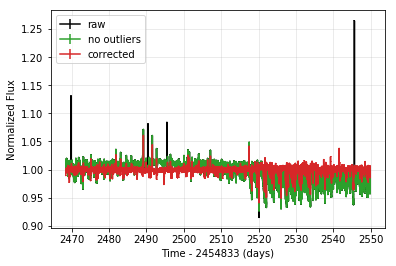

In [81]:
ax = sc_hats11_m.plot(label='raw')
ax1=sc.plot(ax=ax, color='C2',label="no outliers")
corr_sc.plot(ax=ax1,color='C3',label="corrected")

100%|██████████| 20/20 [00:13<00:00,  1.45it/s]


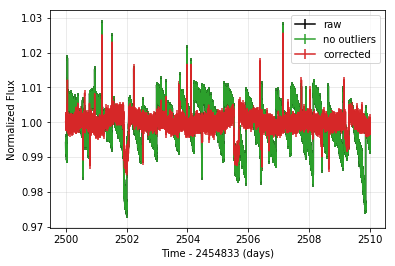

In [84]:
corr20_sc = sc.correct(windows=20)
ax = sc_hats11_m[(sc_hats11.time>2500) & (sc_hats11.time<2510)].plot(label='raw')
ax1 = sc[(sc.time>2500)&(sc.time<2510)].plot(ax=ax, color='C2',label="no outliers");
corr20_sc[(corr20_sc.time>2500) & (corr20_sc.time<2510)].plot(ax=ax1,color='C3',label="corrected")

In [85]:
sff = SFFCorrector()
sc_corrected = sff.correct(sc.time, sc.flux, sc.centroid_col, sc.centroid_row,
                           niters=1, windows=1, polyorder=5)

100%|██████████| 1/1 [00:12<00:00, 12.75s/it]


Text(0,0.5,'Relative Brightness')

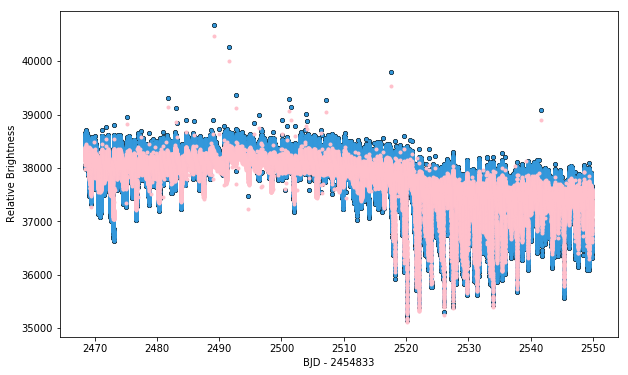

In [86]:
long_term_trend = sff.trend
plt.figure(figsize=(10,6))

dy = 0.004
plt.plot(sc.time, sc.flux + dy, 'ko', ms=4)
plt.plot(sc.time, sc.flux+dy, 'o', color='#3498db', ms=3)
plt.plot(sc_corrected.time, sc_corrected.flux * long_term_trend, 'o', color='pink', ms = 3)

plt.xlabel('BJD - 2454833')
plt.ylabel('Relative Brightness')

(2500, 2510)

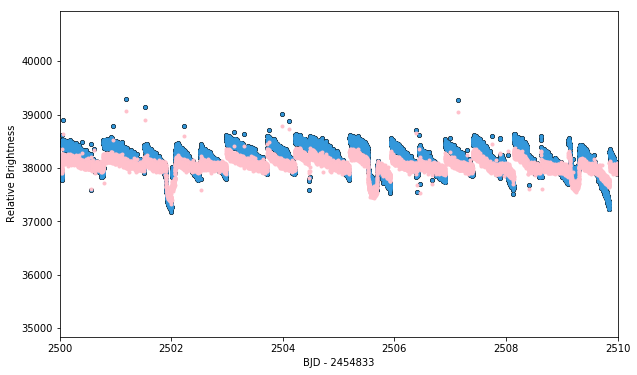

In [88]:
plt.figure(figsize=(10,6))

dy = 0.004
plt.plot(sc.time, sc.flux + dy, 'ko', ms=4)
plt.plot(sc.time, sc.flux+dy, 'o', color='#3498db', ms=3)
plt.plot(sc_corrected.time, sc_corrected.flux * long_term_trend, 'o', color='pink', ms = 3)

plt.xlabel('BJD - 2454833')
plt.ylabel('Relative Brightness')
plt.xlim(2500, 2510)

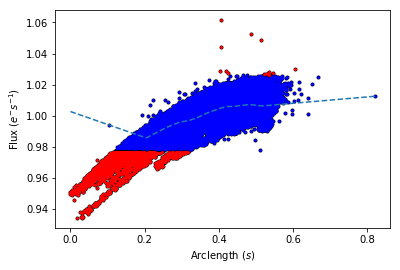

In [89]:
sff._plot_normflux_arclength();

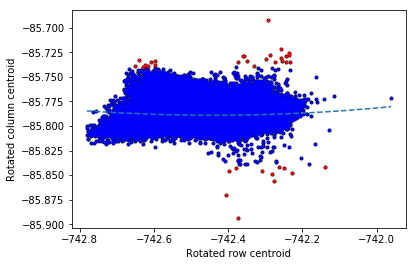

In [90]:
sff._plot_rotated_centroids()

In [101]:
sff = SFFCorrector()
sc_corrected = sff.correct(sc.time, sc.flux, sc.centroid_col, sc.centroid_row,
                           niters=5, windows=1, polyorder=5)

long_term_trend = sff.trend
## the length of this array is length(lc_corrected) / windows


100%|██████████| 1/1 [00:13<00:00, 13.12s/it]


Text(0,0.5,'Relative Brightness')

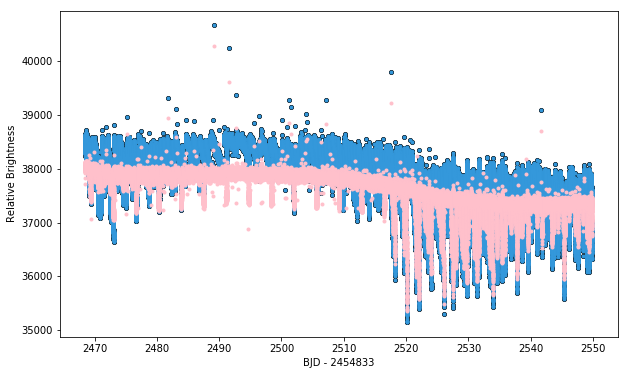

In [104]:
plt.figure(figsize=(10,6))

dy = 0.004
plt.plot(sc.time, sc.flux + dy, 'ko', ms=4)
plt.plot(sc.time, sc.flux+dy, 'o', color='#3498db', ms=3)
# can't put the long term trend back in because it's a shorter array than the flux array...
plt.plot(sc_corrected.time, sc_corrected.flux * long_term_trend, 'o', color='pink', ms = 3)
#plt.plot(sc_corrected.time, sc_corrected.flux, 'o', color='pink', ms = 3)

plt.xlabel('BJD - 2454833')
plt.ylabel('Relative Brightness')


(2500, 2510)

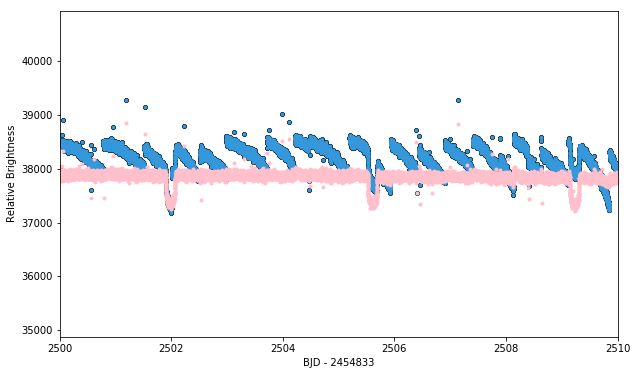

In [106]:
plt.figure(figsize=(10,6))

dy = 0.004
plt.plot(sc.time, sc.flux + dy, 'ko', ms=4)
plt.plot(sc.time, sc.flux+dy, 'o', color='#3498db', ms=3)
plt.plot(sc_corrected.time, sc_corrected.flux* long_term_trend, 'o', color='pink', ms = 3)

plt.xlabel('BJD - 2454833')
plt.ylabel('Relative Brightness')
plt.xlim(2500, 2510)

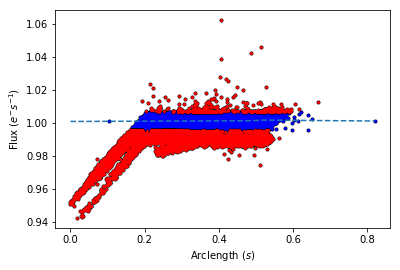

In [107]:
sff._plot_normflux_arclength();

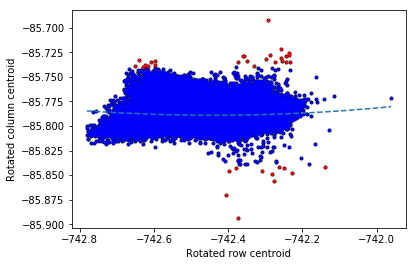

In [108]:
sff._plot_rotated_centroids()